In [1]:
import numpy as np
import matplotlib.pyplot as plt

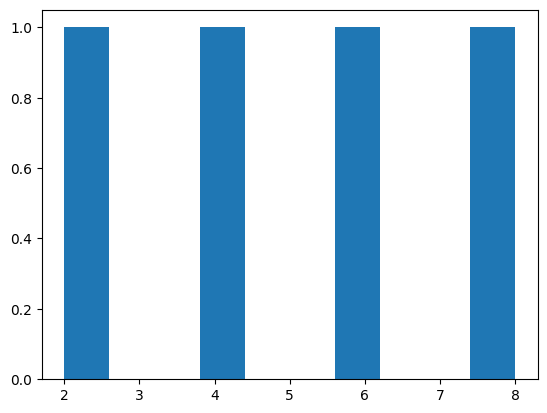

In [2]:
data = [2, 4, 6, 8]

count, bins, ignored = plt.hist(data)
plt.show()

In [3]:
print(count)
print(bins)
print(ignored)

[1. 0. 0. 1. 0. 0. 1. 0. 0. 1.]
[2.  2.6 3.2 3.8 4.4 5.  5.6 6.2 6.8 7.4 8. ]
<BarContainer object of 10 artists>


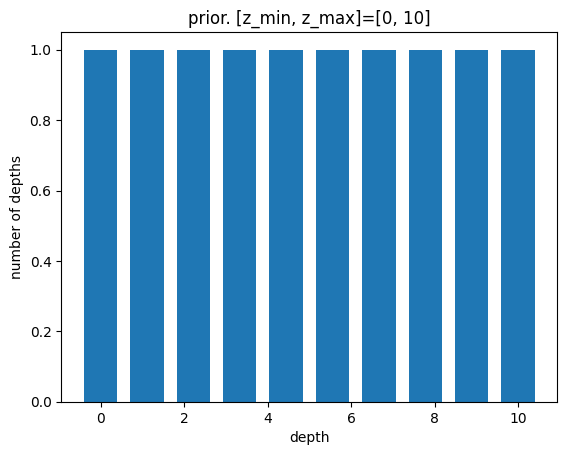

z: [ 0.          1.11111111  2.22222222  3.33333333  4.44444444  5.55555556
  6.66666667  7.77777778  8.88888889 10.        ]


In [4]:
# prior p(Z)
z_min, z_max = 0, 10
z = np.linspace(z_min, z_max, 10)

plt.bar(z, np.ones_like(z))
plt.title(f"prior. [z_min, z_max]=[{z_min}, {z_max}]")
plt.xlabel('depth')
plt.ylabel('number of depths')
plt.show()
print("z:", z)

In [5]:
# likelihood p(x|Z)
def plot_likelihood(xs):
    gaussian_dist = lambda mean, std, sample: 1/np.sqrt(2*np.pi*std**2) * np.exp(-((sample-mean)**2/(2*std**2)))

    depth_bins = np.linspace(z_min, z_max, 100)

    likelihoods = []
    for z in depth_bins:
        mean = z
        std = 1.0  # tau

        # likelihood = np.prod(gaussian_dist(mean, std, xs))
        log_likelihood = np.sum(np.log(gaussian_dist(mean, std, xs)))
        # likelihood = np.sum(gaussian_dist(mean, std, xs))
        # likelihood = 0.5*likelihood + 0.5/(z_max - z_min)
        likelihoods.append(log_likelihood)


    # Plot
    fig, ax = plt.subplots()
    counts, bins = np.histogram(xs, bins=depth_bins)
    ax.set_ylabel('depth samples (x)')
    ax.set_xlabel('depth')
    ax.bar(bins[:-1], counts, width=0.2, color='gray', label='bar')

    ax2 = ax.twinx()
    ax2.set_xlabel('depth (Z)')
    ax2.set_ylabel('p(x|Z)')
    ax2.plot(depth_bins, likelihoods, color='r', label='likelihood p(x|Z)')

    ax.legend(loc=2)
    ax2.legend(loc=1)
    plt.title("Likelihood")
    plt.tight_layout()
    plt.show()

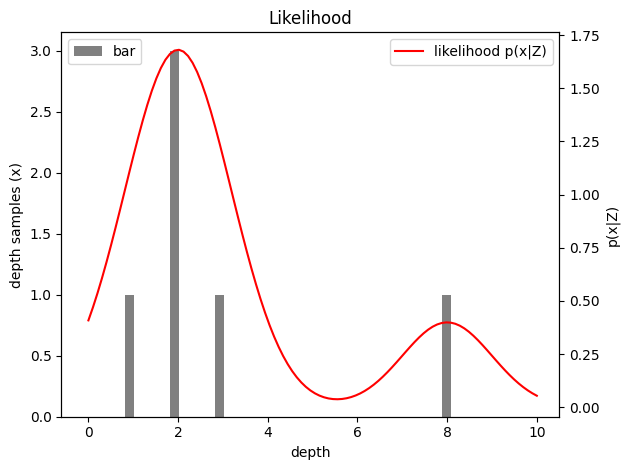

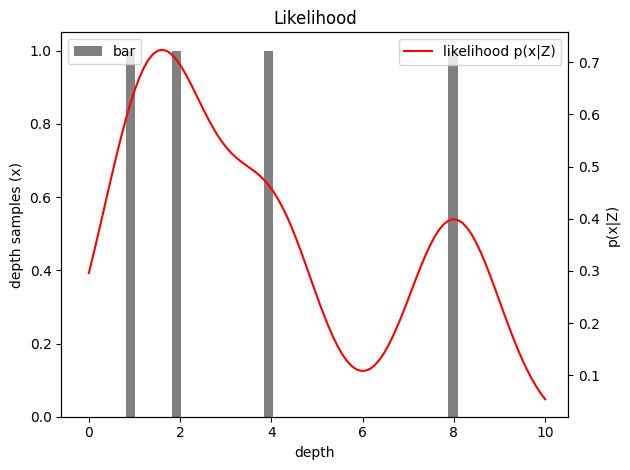

In [6]:
xs = [1, 2, 2, 2, 3, 8]  # sample depths
plot_likelihood(xs)
plot_likelihood([1, 2, 4, 8])

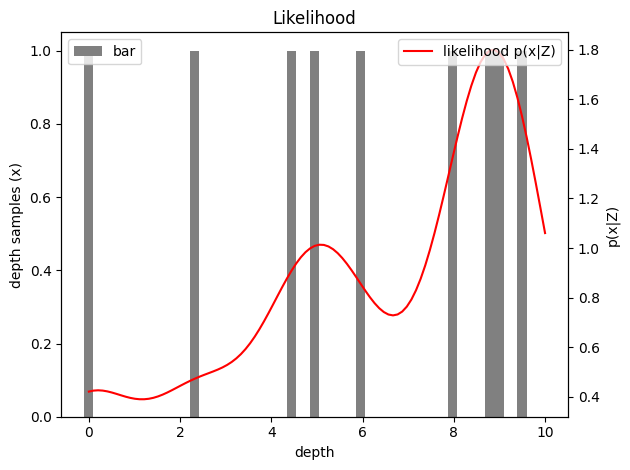

In [7]:
plot_likelihood([0, 2.4, 4.5, 5, 6, 8, 8.8, 8.9, 9, 9.5])

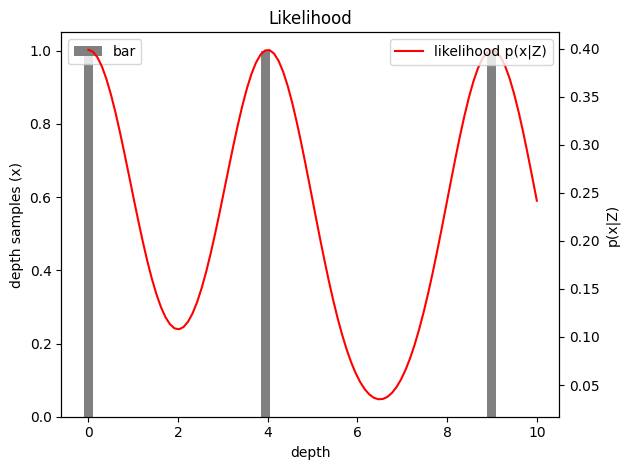

In [8]:
plot_likelihood([0, 4, 9])

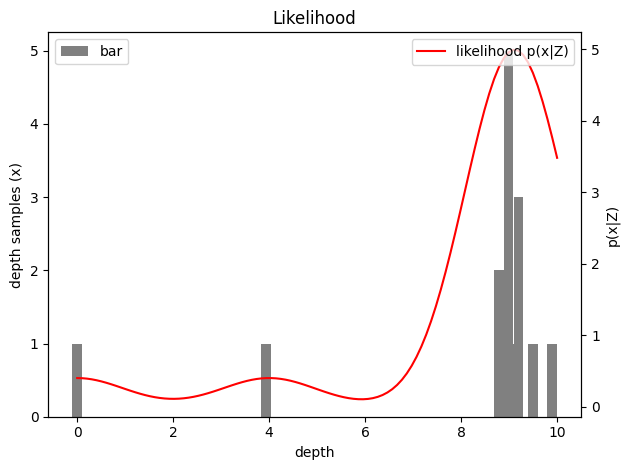

In [9]:
plot_likelihood([0, 4, 8.8, 8.8, 9, 9, 9, 9, 9, 9.1, 9.2, 9.2, 9.2, 9.5, 9.9])

In [5]:
# posterior p(Z|x)

# likelihood와 비례.
# p(Z|x) = p(x|Z) * p(Z) / p(x)``


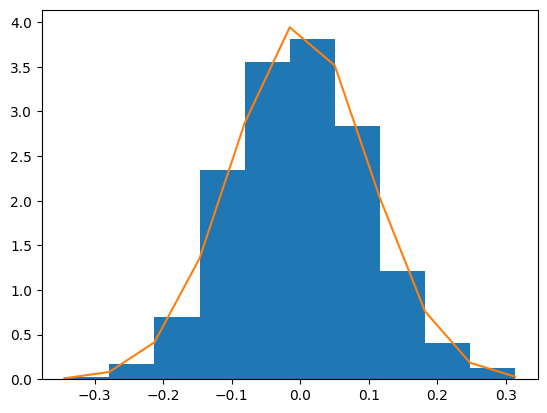

In [37]:
mean, std = 0, 0.1

normal_samples = np.random.normal(mean, std, 1000)

count, bins, ignored = plt.hist(normal_samples, density=True)


plt.plot(bins, gaussian_distribution(mean=mean, std=std, sample=bins))
plt.show()

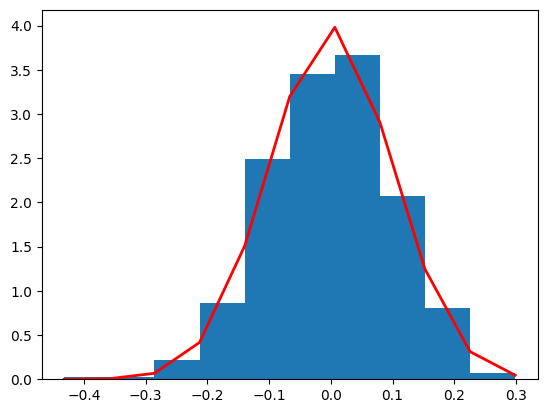

In [15]:
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)

count, bins, ignored = plt.hist(s, 10, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

In [18]:
sample = lambda mu, sigma, bins: 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2))

print(gaussian_distribution(0, 1, 1))
print(sample(0, 1, 1))

0.24197072451914337
0.24197072451914337
